# Try Tutorial
Decided to do a tutorial on pyflux fitting with Metropolis Hastings:

http://pyflux.readthedocs.io/en/latest/getting_started.html

In [19]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats # need to for some reason otherwise can't call sp.stats
import matplotlib.pyplot as plt
%matplotlib inline

import pyflux as pf

In [10]:
df = pd.read_csv('data/AirPassengers.csv', index_col='Month')

In [11]:
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


### Inspect data

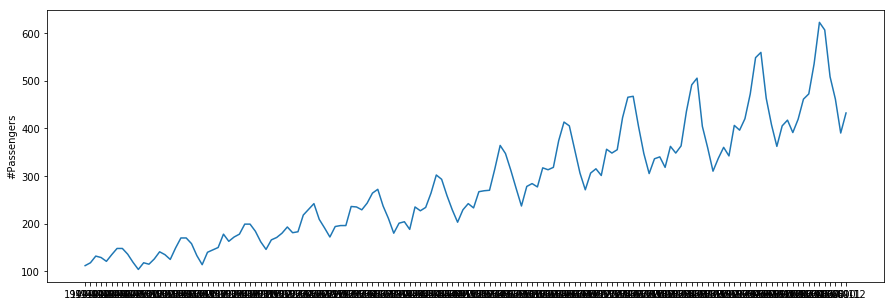

In [18]:
plt.figure(figsize=(15, 5))
plt.ylabel("#Passengers")
plt.plot(df)
plt.show();

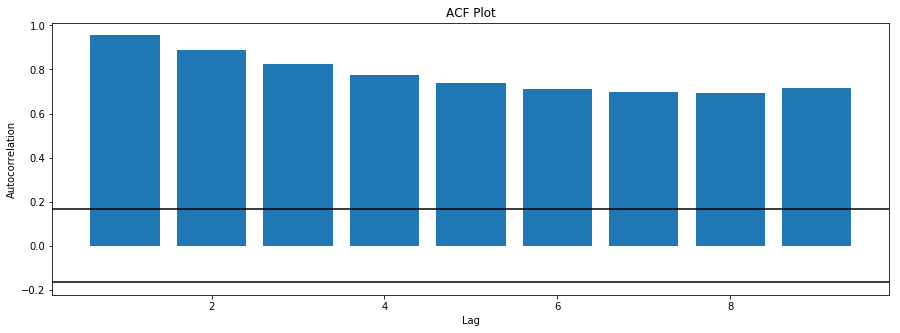

In [32]:
pf.acf_plot(df.values.T[0], 20)

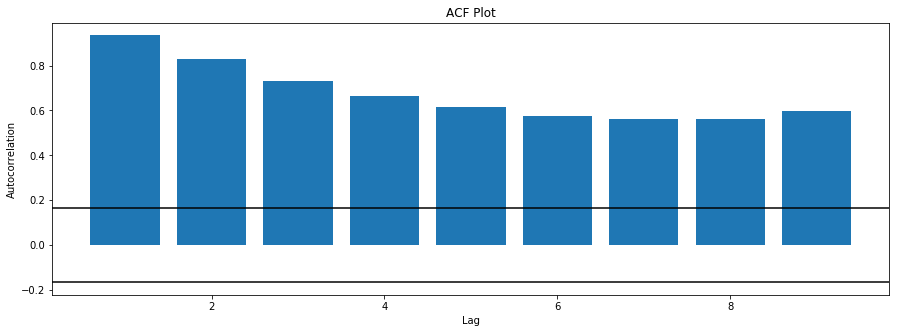

In [61]:
pf.acf_plot(np.square(df.values.T[0]), 20)

Definitely autocorrelation

### propose a model

In [20]:
model = pf.GARCH(p=1, q=1, data=df)

In [21]:
print(model.latent_variables)

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


In [ ]:
model.adjust_prior()

### Perform Inference

In [23]:
result = model.fit("M-H", nsims=20000)

Acceptance rate of Metropolis-Hastings is 2.5e-05
Acceptance rate of Metropolis-Hastings is 0.0093
Acceptance rate of Metropolis-Hastings is 0.134925
Acceptance rate of Metropolis-Hastings is 0.169375
Acceptance rate of Metropolis-Hastings is 0.20865
Acceptance rate of Metropolis-Hastings is 0.281925

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.283075


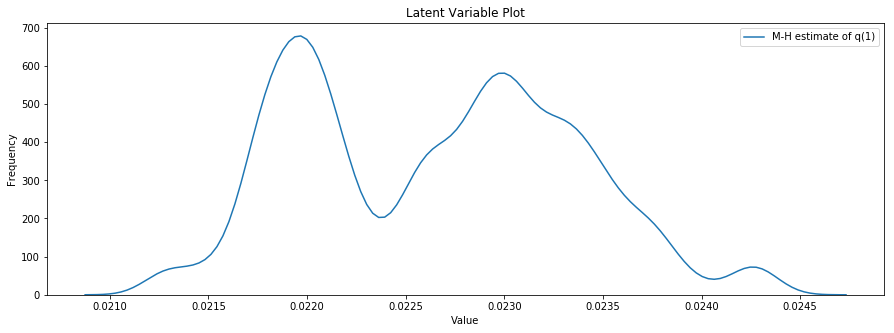

In [53]:
model.plot_z([1])

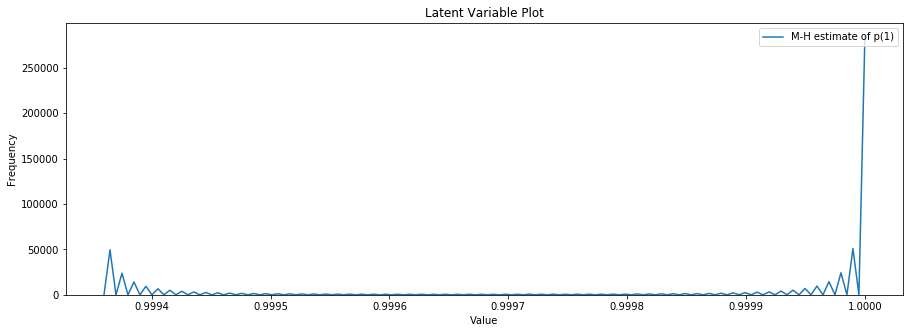

In [54]:
model.plot_z([2])

### Evaluate Model Fit

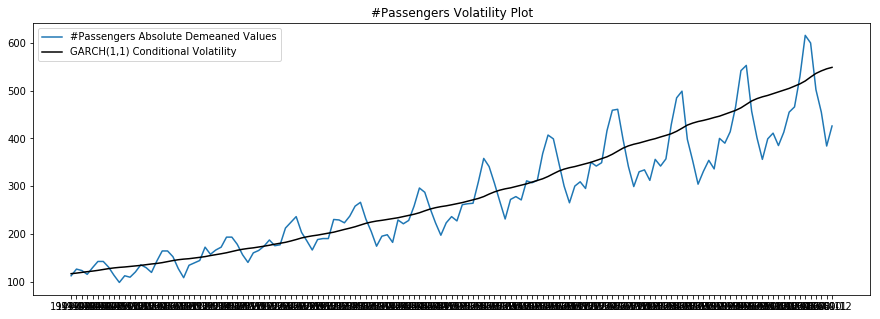

In [55]:
model.plot_fit(figsize=(15,5))

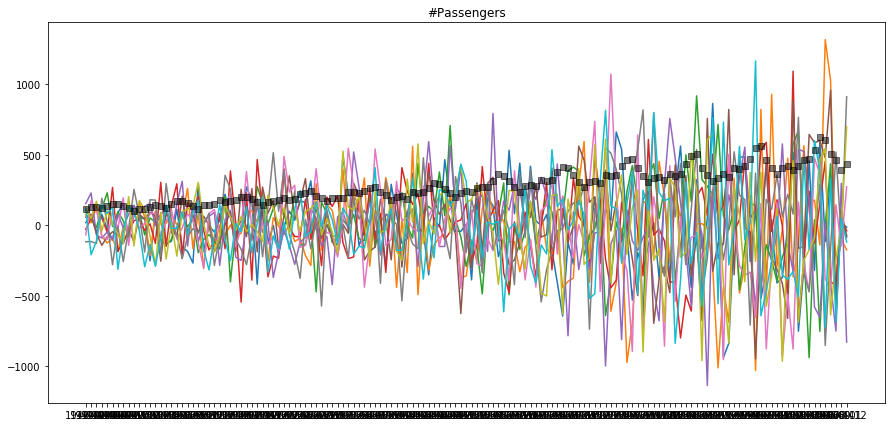

In [26]:
model.plot_sample(nsims=10, figsize=(15, 7))

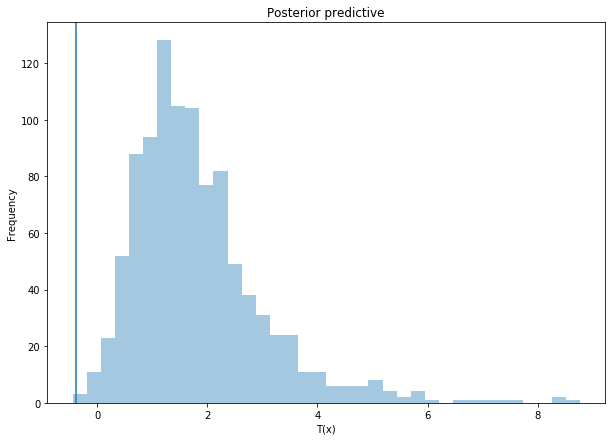

In [57]:
model.plot_ppc(T=sp.stats.kurtosis)

### Analyse and Predict